In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


In [2]:
mnist=tf.keras.datasets.fashion_mnist #getting the data from fashion mnist dataset which is in tensorflow

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() # loading and splitting the data. x's are actual data and y's are labels of that data

In [4]:
if K.image_data_format() == 'channels_first': #changing the data shape to fit the model to either (1,28,28)which is channels on the first dimension 
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28) # giving the train images shape and change it to (1,28,28)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, 28)# same as above
    input_shape = (1, 28, 28)
else: #changing the shape of data to (28,28,1) which is channel is last dimension
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)# giving the train images shape and change it to (28,28,1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)#same as above for test images
    input_shape = (28, 28, 1)

In [5]:
#Normalizing the data to scale pixel values 0 to 1
x_test=x_test/255.0
x_train=x_train/255.0

In [6]:
# creating a model
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape), # 3 by 3 convolution layer with filter of 32 
                                  tf.keras.layers.Flatten(),#changing shape of the data to 1D array
                                  tf.keras.layers.Dense(1024,input_shape=(28,28,1), activation=tf.nn.relu), # creating actual layer wit 1024 neurons with given input shape and activation function
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) #output layer with 10 neurons because our dataset has 10 classes. output layers must have same neuron number as class count

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(optimizer="adam", # learning function
              loss="sparse_categorical_crossentropy", # getting the loss of that learning process with this function and use it for later epocs
              metrics=["accuracy"])# printing accuracy on screen
model.summary() # summary of the model which show us the layers, shape of output after that layer ends and parameter accordingly

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              11076608  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 11,087,018
Trainable params: 11,087,018
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(x_train,y_train,epochs=2,batch_size=2048)# now training begins with given train dataset(x_train) and labels of them(y_train) with 2 repeating(epochs)
#batch size is like how much data goes on the network at the same time to train, lower values is increasing the accuracy after each epoch

Epoch 1/2
60000/60000 [==============================] - 40s 668us/sample - loss: 0.6963 - acc: 0.7611
Epoch 2/2
60000/60000 [==============================] - 43s 717us/sample - loss: 0.3681 - acc: 0.8699


In [9]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap # importing shap
import numpy as np #importing numpy

# select a set of background examples to take an expectation over
background = x_test[np.random.choice(x_test.shape[0], 100, replace=False)] # selecting 100 random images in test dataset

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background) # giving model and images to the shap explainer
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[10:20]) # getting the shap values of images between index of 10 to 19

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


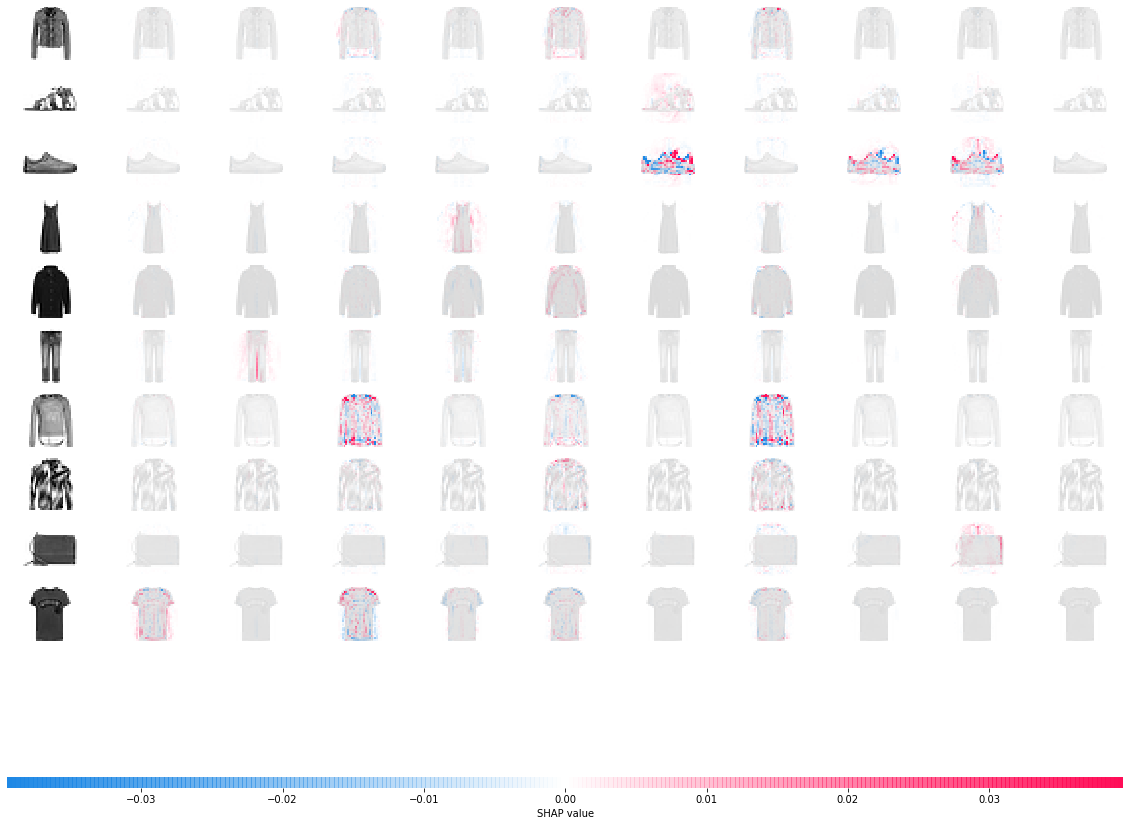

In [10]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[10:20]) # plotting the shap images